In [3]:
import pickle
import numpy as np
import os

In [4]:
os.listdir()

['Untitled.ipynb',
 'model6.h5',
 'chatbot_120_epochs.h5',
 'chatbot_10.h5',
 'train_qa.txt',
 'epochBIG.h5',
 'my_mobydick_model.h5',
 'simple',
 'test_qa.txt',
 'myfirstmodel.h5',
 'iris.csv',
 '02-Chat-Bots.ipynb',
 'my_simpletokenizer',
 'epoch250',
 'moby_dick_four_chapters.txt',
 'melville-moby_dick.txt',
 '.ipynb_checkpoints',
 'epochBIG',
 'epoch250.h5',
 '01-Text-Generation-with-Neural-Networks.ipynb',
 '00-Keras-Basics.ipynb',
 'simple.h5']

In [5]:
with open('train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

In [6]:
with open('test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [7]:
type(test_data)

list

In [8]:
type(train_data)


list

In [9]:
len(test_data)

1000

In [10]:
len(train_data)

10000

In [11]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [13]:
# story

' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [14]:
# question

' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [15]:
# answer

train_data[0][2]

'no'

In [16]:
# each set is a list of tuples

all_data = test_data + train_data

len(all_data)

11000

In [23]:
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [24]:
vocab = set()

for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [25]:
vocab.add('no')

In [26]:
vocab.add('yes')

In [27]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [28]:
# add 1 for padding

vocab_len = len(vocab) + 1

In [29]:
vocab_len

38

# Find out length of longest story and longest question

In [35]:
# make a list of all lengths

all_story_lens = [len(data[0]) for data in all_data] 

In [36]:
max_story_len = max(all_story_lens)

In [37]:
max_story_len

156

In [38]:
max_question_len = max([len(data[1]) for data in all_data])

In [39]:
max_question_len

6

# Preprocess

In [40]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [41]:
tokenizer = Tokenizer(filters = [])

In [42]:
tokenizer.fit_on_texts(vocab)

In [43]:
tokenizer.word_index

{'.': 1,
 'bathroom': 2,
 'apple': 3,
 'no': 4,
 'john': 5,
 'football': 6,
 'to': 7,
 'hallway': 8,
 'yes': 9,
 'daniel': 10,
 'up': 11,
 'journeyed': 12,
 'milk': 13,
 'there': 14,
 'the': 15,
 '?': 16,
 'kitchen': 17,
 'bedroom': 18,
 'discarded': 19,
 'got': 20,
 'down': 21,
 'office': 22,
 'grabbed': 23,
 'put': 24,
 'in': 25,
 'left': 26,
 'back': 27,
 'took': 28,
 'travelled': 29,
 'picked': 30,
 'is': 31,
 'mary': 32,
 'sandra': 33,
 'dropped': 34,
 'went': 35,
 'moved': 36,
 'garden': 37}

# Tokenize Stories, Questions and Answers

In [45]:
train_story_text = []
train_question_text = []
train_answers = []

In [46]:
for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [47]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [48]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [49]:
len(train_story_seq)

10000

In [50]:
# vectorize the stories

def vectorize_stories(data, word_index = tokenizer.word_index,
                      max_story_len = max_story_len,
                      max_question_len = max_question_len):
    # stories
    X = []
    
    # questions
    Xq = []
    
    # correc answer (yes/no)
    Y = []
    
    for story, query, answer in data:
        
        # for each story
        x = [word_index[word.lower()] for word in story]
        
        xq = [word_index[word.lower()] for word in query]
        
        y = np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X, maxlen=max_story_len),
            pad_sequences(Xq, maxlen=max_question_len),
            np.array(Y))

In [51]:
# apply the vectorizer

inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [52]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [53]:
inputs_test

array([[ 0,  0,  0, ..., 15, 18,  1],
       [ 0,  0,  0, ..., 15, 37,  1],
       [ 0,  0,  0, ..., 15, 37,  1],
       ...,
       [ 0,  0,  0, ..., 15,  3,  1],
       [ 0,  0,  0, ..., 15, 37,  1],
       [ 0,  0,  0, ...,  3, 14,  1]], dtype=int32)

In [54]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
tokenizer.word_index['yes']

9

In [56]:
tokenizer.word_index['no']

4

In [57]:
sum(answers_test)

array([  0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,   0., 497.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [59]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [60]:
# placeholder shape = (max_story_len, batch_size)

input_sequence = Input((max_story_len, ))
question = Input((max_question_len,))

In [61]:
vocab_size = len(vocab) + 1

In [62]:
# Input Encoder M

input_encoder_m = Sequential()

# add the embedding layer
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
input_encoder_m.add(Dropout(0.3))

# OUTPUT (samples, story_maxlen, embedding_dim)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [63]:
# Input Encoder C

input_encoder_c = Sequential()

# add the embedding layer
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

# OUTPUT (samples, story_maxlen, max_question_len)

In [64]:
# question encoder


question_encoder = Sequential()

# add the embedding layer
question_encoder.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_question_len))
question_encoder.add(Dropout(0.3))

# OUTPUT (samples, query_maxlen, embedding_dim)

In [65]:
# result of passing through encoder
# ENCODER(INPUT) ------> ENCODED


input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [68]:
# create a dot product

match = dot([input_encoded_m, question_encoded], axes=(2,2))
match = Activation('softmax')(match)

In [69]:
response = add([match, input_encoded_c])
response = Permute((2,1))(response)

In [74]:
# contatenate match with question encoded

answer = concatenate([response, question_encoded])
answer

<tf.Tensor 'concatenate_2/concat:0' shape=(?, 6, 220) dtype=float32>

In [75]:
# reduce with RNN (LSTM)

answer = LSTM(32)(answer)


In [77]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer) # (samples, vocab_size) # YES/NO 0000

In [78]:
model = Model([input_sequence, question], answer)

In [80]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [81]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
__________________________________________________________________________________________________
dot_2 (Dot

# Fit and Train Network

In [83]:
# sample run with 3 epoch, full run is 120 epochs

history = model.fit([inputs_train, queries_train],
                    answers_train,
                    batch_size=32,
                    epochs=120,
                    validation_data=([inputs_test, queries_test], answers_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/120
10000/10000 [==============================] - 32s 3ms/step - loss: 8.3776 - acc: 0.1217 - val_loss: 8.1074 - val_acc: 0.5030
Epoch 2/120
10000/10000 [==============================] - 32s 3ms/step - loss: 8.1653 - acc: 0.1589 - val_loss: 8.1074 - val_acc: 0.5030
Epoch 3/120
10000/10000 [==============================] - 31s 3ms/step - loss: 8.1983 - acc: 0.2105 - val_loss: 8.1074 - val_acc: 0.5030
Epoch 4/120
10000/10000 [==============================] - 32s 3ms/step - loss: 7.8961 - acc: 0.2543 - val_loss: 8.1074 - val_acc: 0.5030
Epoch 5/120
10000/10000 [==============================] - 31s 3ms/step - loss: 8.1863 - acc: 0.3154 - val_loss: 8.1074 - val_acc: 0.5030
Epoch 6/120
10000/10000 [==============================] - 31s 3ms/step - loss: 8.0989 - acc: 0.2949 - val_loss: 8.0107 - val_acc: 0.5030
Epoch 7/120
10000/10000 [==============================] - 32s 3ms/step - loss: 8.2030 - acc: 0.3175 - val_loss: 8.1074 - v

10000/10000 [==============================] - 32s 3ms/step - loss: 8.3055 - acc: 0.4078 - val_loss: 8.1074 - val_acc: 0.5030
Epoch 60/120
10000/10000 [==============================] - 32s 3ms/step - loss: 8.2423 - acc: 0.4008 - val_loss: 8.1074 - val_acc: 0.5030
Epoch 61/120
10000/10000 [==============================] - 32s 3ms/step - loss: 8.2933 - acc: 0.4068 - val_loss: 8.1074 - val_acc: 0.5030
Epoch 62/120
10000/10000 [==============================] - 32s 3ms/step - loss: 8.3441 - acc: 0.4048 - val_loss: 8.1074 - val_acc: 0.5030
Epoch 63/120
10000/10000 [==============================] - 32s 3ms/step - loss: 8.2778 - acc: 0.4100 - val_loss: 8.1074 - val_acc: 0.5030
Epoch 64/120
10000/10000 [==============================] - 32s 3ms/step - loss: 8.2544 - acc: 0.4028 - val_loss: 8.1074 - val_acc: 0.5030
Epoch 65/120
10000/10000 [==============================] - 32s 3ms/step - loss: 8.1968 - acc: 0.4083 - val_loss: 8.1074 - val_acc: 0.5030
Epoch 66/120
10000/10000 [==============

Epoch 118/120
10000/10000 [==============================] - 31s 3ms/step - loss: 7.9895 - acc: 0.4348 - val_loss: 8.1074 - val_acc: 0.5030
Epoch 119/120
10000/10000 [==============================] - 32s 3ms/step - loss: 8.0999 - acc: 0.4402 - val_loss: 8.1074 - val_acc: 0.5030
Epoch 120/120
10000/10000 [==============================] - 33s 3ms/step - loss: 8.2615 - acc: 0.4488 - val_loss: 8.1074 - val_acc: 0.5030


In [84]:
filename = 'QA_chatbot_120_epochs.h5'
model.save(filename)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


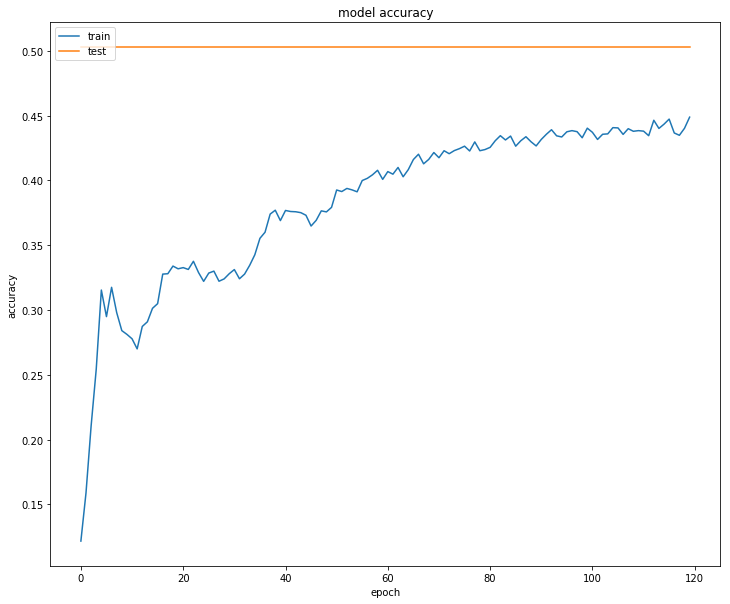

In [86]:
# plot of performance

import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(12,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
filename = 'chatbot_120_epochs.h5'

model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

In [88]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [90]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [91]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [92]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [89]:
pred_results[0]

array([-2.7586559e+01, -2.7664282e+01, -2.7688114e+01, -2.7777399e+01,
       -2.7628319e+01, -2.7663845e+01, -8.1073344e-03, -2.7718746e+01,
       -2.7662943e+01, -2.7902298e+01, -2.7605976e+01, -2.7571323e+01,
       -2.7465427e+01, -2.7550709e+01, -2.7691757e+01, -2.7667227e+01,
       -2.7951252e+01, -2.7394096e+01, -2.7907759e+01,  1.7273082e+00,
       -2.7623688e+01, -2.7876883e+01, -2.7729717e+01, -2.7608356e+01,
       -2.7966370e+01, -2.7718193e+01, -2.7852051e+01, -2.7875242e+01,
       -2.7689466e+01, -2.7733967e+01, -2.7895584e+01, -2.7609390e+01,
       -2.7792755e+01, -2.7693748e+01, -2.7914265e+01, -2.7834541e+01,
       -2.7677803e+01, -2.7714375e+01], dtype=float32)

In [93]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  discarded
Probability of certainty was:  1.7273082


# Stories and Questions

In [94]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [95]:
# Note the whitespace of the periods
# words need to be consistent/in the vocab
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [96]:
my_question = "Is the football in the garden ?"

In [97]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [98]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [99]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [100]:
pred_results = model.predict(([ my_story, my_ques]))

In [101]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  football
Probability of certainty was:  3.0385005
